In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random

%matplotlib inline

import matplotlib.pyplot as plt

import functions

import datetime

# QR1 

1) Plot the daily average for each month

    first of all:
    - understand data => what should we remove?
        - I think data which has different months/years
        
    

## notes and comments:

For this task, we didn't take in consider to get a smaller random sample from the csv files.

We found that one of the fastest way to get data is to extract from all the csv files only the columns that we need.

So we took only the columns that we needed, and than we filtered them by some criteria:

    - bla bla bla
    - bla bla bla


In [3]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# taxi_zone_lookup.csv file
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

In [ ]:
# DEBUG (TIME)
import time

start_time = time.time()
#daily_average_lst = functions.compute_daily_average(df_names)
print("--- %s seconds ---" % (time.time() - start_time))



In [10]:
daily_average_lst = functions.compute_daily_average(df_names)

--- 91.46833610534668 seconds ---


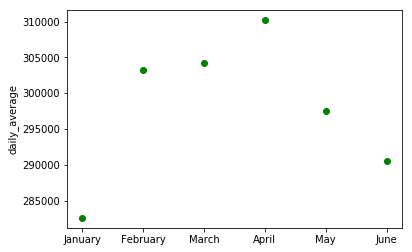

In [11]:
# plot daily_average_lst
months = ['January','February','March','April','May','June']
plt.xticks(range(1,7),months)
plt.ylabel("daily_average")
plt.plot(range(1,7), daily_average_lst, 'go')

In [44]:

# making a list of Borough
borough_lst = list(np.unique(taxi_zone_lookup.Borough))

# init dictionary of borough's averages
borough_averages = defaultdict(list)

In [74]:
for i in range(1):
    df = pd.read_csv(df_names[i],usecols= ['tpep_pickup_datetime', 'PULocationID'], parse_dates= ["tpep_pickup_datetime"])
    df[(df['tpep_pickup_datetime'].dt.year == 2018) & (df['tpep_pickup_datetime'].dt.month == i+1)]


    

In [59]:
df.shape

(8759874, 2)

NameError: name 'NaN' is not defined

In [67]:
df = pd.merge(df, taxi_zone_lookup, how = 'left', left_on = 'PULocationID', right_on = 'LocationID')



In [68]:
df.head

<bound method NDFrame.head of         tpep_pickup_datetime  PULocationID  LocationID    Borough  \
0        2018-01-01 00:21:05            41          41  Manhattan   
1        2018-01-01 00:44:55           239         239  Manhattan   
2        2018-01-01 00:08:26           262         262  Manhattan   
3        2018-01-01 00:20:22           140         140  Manhattan   
4        2018-01-01 00:09:18           246         246  Manhattan   
5        2018-01-01 00:29:29           143         143  Manhattan   
6        2018-01-01 00:38:08            50          50  Manhattan   
7        2018-01-01 00:49:29           239         239  Manhattan   
8        2018-01-01 00:56:38           238         238  Manhattan   
9        2018-01-01 00:17:04           170         170  Manhattan   
10       2018-01-01 00:41:03           162         162  Manhattan   
11       2018-01-01 00:52:54           141         141  Manhattan   
12       2018-01-01 00:17:54           137         137  Manhattan   
13  

In [72]:
df.groupby("Borough").count()

,tpep_pickup_datetime,PULocationID,LocationID,Zone,service_zone
Borough,,,,,
Bronx,7389,7389,7389,7389,7389
Brooklyn,100250,100250,100250,100250,100250
EWR,571,571,571,571,571
Manhattan,7965703,7965703,7965703,7965703,7965703
Queens,526906,526906,526906,526906,526906
Staten Island,144,144,144,144,144
Unknown,158911,158911,158911,155094,0


In [73]:
df.head()

,tpep_pickup_datetime,PULocationID,LocationID,Borough,Zone,service_zone
0,2018-01-01 00:21:05,41,41,Manhattan,Central Harlem,Boro Zone
1,2018-01-01 00:44:55,239,239,Manhattan,Upper West Side South,Yellow Zone
2,2018-01-01 00:08:26,262,262,Manhattan,Yorkville East,Yellow Zone
3,2018-01-01 00:20:22,140,140,Manhattan,Lenox Hill East,Yellow Zone
4,2018-01-01 00:09:18,246,246,Manhattan,West Chelsea/Hudson Yards,Yellow Zone


In [4]:
df = pd.read_csv(df_names[1], parse_dates= ["tpep_pickup_datetime"])


In [77]:
temp = df

In [5]:
(df[(df["trip_distance"]==0) & (df["total_amount"]!=0)])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-02-01 00:01:58,2018-02-01 00:04:03,1,0.0,1,N,145,145,2,3.50,0.5,0.5,0.00,0.00,0.3,4.80
385,2,2018-02-01 00:16:42,2018-02-01 00:16:44,1,0.0,2,N,264,231,1,52.00,0.0,0.5,13.20,0.00,0.3,66.00
479,1,2018-02-01 00:56:02,2018-02-01 00:56:23,1,0.0,1,N,79,79,3,2.50,0.5,0.5,0.00,0.00,0.3,3.80
727,1,2018-02-01 00:56:37,2018-02-01 00:56:54,1,0.0,1,N,113,113,3,2.50,0.5,0.5,0.00,0.00,0.3,3.80
853,2,2018-02-01 00:48:47,2018-02-01 00:48:50,2,0.0,5,N,264,170,1,68.00,0.0,0.5,13.76,0.00,0.3,82.56
1060,2,2018-02-01 00:12:33,2018-02-01 00:12:37,1,0.0,5,N,264,249,2,11.00,0.0,0.5,0.00,0.00,0.3,11.80
1162,2,2018-02-01 00:33:21,2018-02-01 00:33:34,5,0.0,2,N,162,162,1,52.00,0.0,0.5,8.00,5.76,0.3,66.56
1320,1,2018-02-01 00:06:47,2018-02-01 00:06:47,1,0.0,1,N,239,264,2,16.00,0.5,0.5,0.00,0.00,0.3,17.30
1384,1,2018-02-01 00:26:39,2018-02-01 00:27:08,2,0.0,5,N,265,265,1,50.00,0.0,0.0,0.00,0.00,0.3,50.30
1524,1,2018-02-01 00:18:46,2018-02-01 00:18:46,1,0.0,2,N,132,264,2,52.00,0.0,0.5,0.00,5.76,0.3,58.56


In [6]:
df[(df["payment_type"]== 4)]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
65,1,2018-02-01 00:54:43,2018-02-01 01:03:24,1,2.60,1,N,230,238,4,9.5,0.5,0.5,0.0,0.0,0.3,10.8
113,1,2018-02-01 00:11:53,2018-02-01 00:23:04,1,6.40,1,N,238,127,4,19.5,0.5,0.5,0.0,0.0,0.3,20.8
114,1,2018-02-01 00:39:03,2018-02-01 00:53:38,1,3.10,1,N,166,247,4,13.0,0.5,0.5,0.0,0.0,0.3,14.3
415,1,2018-02-01 00:58:40,2018-02-01 01:07:16,1,1.40,1,N,256,112,4,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1382,1,2018-02-01 00:01:09,2018-02-01 00:05:25,1,0.50,1,N,161,230,4,4.5,0.5,0.5,0.0,0.0,0.3,5.8
1383,1,2018-02-01 00:11:06,2018-02-01 00:18:38,1,1.00,1,N,230,68,4,7.0,0.5,0.5,0.0,0.0,0.3,8.3
1702,1,2018-02-01 00:27:17,2018-02-01 00:28:16,1,0.10,1,N,229,229,4,2.5,0.5,0.5,0.0,0.0,0.3,3.8
2241,2,2018-02-01 00:55:23,2018-02-01 01:03:57,1,0.52,1,N,107,113,4,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3
2354,1,2018-02-01 00:08:56,2018-02-01 00:33:47,1,4.80,1,N,256,188,4,19.0,0.5,0.5,0.0,0.0,0.3,20.3
2553,1,2018-02-01 00:50:05,2018-02-01 00:50:07,1,0.00,1,N,137,137,4,2.5,0.5,0.5,0.0,0.0,0.3,3.8
